## Import
Import **numpy**, **pandas**, **matplotlib**, **time**, **LinearRegression**, **LabelEncoder**, and **CollaborativeFiltering**, and **RuleMiner**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from collaborative_filtering import CollaborativeFiltering
from rule_miner import RuleMiner

pd.options.mode.chained_assignment = None

## Google Play Store Dataset
For this case study, the dataset chosen by the researchers is called `Google Play Store Apps` dataset. This dataset contains 10841 rows which represents transactions by customers shopping for groceries. The dataset contains 13 unique columns.

The dataset is provided as `googleplaystore.csv`. Therefore, we must read the file.

In [2]:
apps_df = pd.read_csv('googleplaystore.csv')
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Data Cleaning and Pre-processing

For data cleaning in this dataset, the researchers decided with these modifications.
1. Remove `Last Updated`, `Current Ver`, `Android Ver`
2. Include Main `Genres` Only
3. Include Main `Content Rating` Only
4. Numerical data for `Installs`, `Size`, `Price`
5. Binning `Rating`, `Reviews`, `Size`, `Installs`
6. Remove/Modify NaN and duplicate observations

### Removing `Last Updated`, `Current Ver`, `Android Ver`

In this case study, the columns `Last Updated`, `Current Ver`, and `Android Ver` are not needed and will be removed

In [3]:
apps_df = apps_df.drop(["Last Updated", "Current Ver", "Android Ver"], axis=1)
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


### Including Main Genre Only in `Genres`

The researchers noticed the presence of too much unique values for `Genres` due to a lot of apps having combined genres. The unique values can be seen below.

In [4]:
apps_df['Genres'].nunique(), apps_df['Genres'].unique()

(120,
 array(['Art & Design', 'Art & Design;Pretend Play',
        'Art & Design;Creativity', 'Art & Design;Action & Adventure',
        'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
        'Comics', 'Comics;Creativity', 'Communication', 'Dating',
        'Education;Education', 'Education', 'Education;Creativity',
        'Education;Music & Video', 'Education;Action & Adventure',
        'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
        'Entertainment;Music & Video', 'Entertainment;Brain Games',
        'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
        'Health & Fitness', 'House & Home', 'Libraries & Demo',
        'Lifestyle', 'Lifestyle;Pretend Play',
        'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
        'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
        'Music', 'Word', 'Racing', 'Casual;Creativity',
        'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
  

To solve this problem, the researches decided to include only the main genres provided in `Genres`. This is to divide the apps into simpler genres and allow easier visualization of categories for this column.

The first genre which comes before the character `;` for multi-genre apps will be considered the main genre. Genres that come after will be removed via string manipulation.

In [5]:
apps_df["Genres"] = apps_df["Genres"].str.split(";", 1).str[0]
apps_df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino',
       'February 11, 2018'], dtype=object)

It is seen that the `Genres` section contained a bizarre genre of 'February 11, 2018', so the researchers decided to see the values of these apps.

In [6]:
apps_df[apps_df["Genres"] == "February 11, 2018"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


The researchers have chosen to drop this since it only contains one observation in the dataset. 

In [7]:
apps_df = apps_df[apps_df['Genres'] != "February 11, 2018"]
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


### Including Main `Content Rating` Only

It is seen below that the `Content Rating` values contained some with 'Everyone' and 'Everyone 10+'. The researchers decided to exclude the age rating and only include the main content rating as well. In this case, the ratings would be 'Everyone', 'Teen', 'Mature', 'Adults', and 'Unrated'.

In [8]:
apps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Simply splitting the strings by the whitespaces and including the first substring will divide the content ratings into its desirable categories.

In [9]:
apps_df["Content Rating"] = apps_df["Content Rating"].str.split(" ", 1).str[0]
apps_df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Mature', 'Adults', 'Unrated'], dtype=object)

### Assigning Numerical Data for `Installs`

Looking at the `Installs` column below, it can be noticed that the data type for the values are not yet initialized as float. Therefore, the researchers will also use string manipulation for this column for conversion to float.

In [10]:
apps_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

First, remove the '+' and ',' symbols to allow it for conversion.

In [11]:
apps_df['Installs'] = apps_df['Installs'].str.replace("+", "")
apps_df['Installs'] = apps_df['Installs'].str.replace(",", "")
apps_df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

Next, it is possible to convert them into float using the pandas `to_numeric()` function.

In [12]:
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], downcast="float")
apps_df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00], dtype=float32)

### Assigning Numerical Data for `Size`

The same can be said for the `Size` column below. Therefore, the researchers will also use string manipulation for this column for conversion to float.

In [13]:
apps_df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

By replacing 'k' into 'e+3' and 'M' into 'e+6', it converts the values into a string that makes the `to_numeric()` function possible. However it is noticed that there is a value named 'Varies with device'. The researchers decided to convert that into NaN and deal with the NaN values in a later step.

In [14]:
apps_df["Size"] = apps_df["Size"].str.replace('k', 'e+3')
apps_df["Size"] = apps_df["Size"].str.replace('M', 'e+6')
apps_df["Size"] = apps_df["Size"].replace('Varies with device', np.nan)
apps_df["Size"].unique()

array(['19e+6', '14e+6', '8.7e+6', '25e+6', '2.8e+6', '5.6e+6', '29e+6',
       '33e+6', '3.1e+6', '28e+6', '12e+6', '20e+6', '21e+6', '37e+6',
       '2.7e+6', '5.5e+6', '17e+6', '39e+6', '31e+6', '4.2e+6', '7.0e+6',
       '23e+6', '6.0e+6', '6.1e+6', '4.6e+6', '9.2e+6', '5.2e+6', '11e+6',
       '24e+6', nan, '9.4e+6', '15e+6', '10e+6', '1.2e+6', '26e+6',
       '8.0e+6', '7.9e+6', '56e+6', '57e+6', '35e+6', '54e+6', '201e+3',
       '3.6e+6', '5.7e+6', '8.6e+6', '2.4e+6', '27e+6', '2.5e+6', '16e+6',
       '3.4e+6', '8.9e+6', '3.9e+6', '2.9e+6', '38e+6', '32e+6', '5.4e+6',
       '18e+6', '1.1e+6', '2.2e+6', '4.5e+6', '9.8e+6', '52e+6', '9.0e+6',
       '6.7e+6', '30e+6', '2.6e+6', '7.1e+6', '3.7e+6', '22e+6', '7.4e+6',
       '6.4e+6', '3.2e+6', '8.2e+6', '9.9e+6', '4.9e+6', '9.5e+6',
       '5.0e+6', '5.9e+6', '13e+6', '73e+6', '6.8e+6', '3.5e+6', '4.0e+6',
       '2.3e+6', '7.2e+6', '2.1e+6', '42e+6', '7.3e+6', '9.1e+6', '55e+6',
       '23e+3', '6.5e+6', '1.5e+6', '7.5e+6', '51

After this, implementing the function will now be possible.

In [15]:
apps_df["Size"] = pd.to_numeric(apps_df["Size"], downcast="float")
apps_df["Size"].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 7.00e+06, 2.30e+07, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07,      nan,
       9.40e+06, 1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06,
       7.90e+06, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

### Assigning Numerical Data for `Price`

The same can also be said for the `Size` column below. Therefore, the researchers will also use string manipulation for this column for conversion to float.

In [16]:
apps_df['Price'] = apps_df['Price'].str.replace("$", "")
apps_df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

After this, using the `to_numeric()` function will now be possible.

In [17]:
apps_df['Price'] = pd.to_numeric(apps_df["Price"], downcast="float")
apps_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04], dtype=float32)

### Dealing with duplicate and NaN values

For duplicated rows, the researchers decided to simply drop these observations.

In [18]:
apps_df.duplicated().sum()

485

In [19]:
apps_df = apps_df.drop_duplicates()
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000.0,Free,0.0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature,Books & Reference


### Dropping Impossible Data

In [20]:
apps_df[apps_df["Installs"] < 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5500000.0,0.0,Paid,1.490000,Everyone,Personalization
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8700000.0,0.0,Paid,13.990000,Teen,Social
5486,AP Series Solution Pro,FAMILY,NaN,0,7400000.0,0.0,Paid,1.990000,Everyone,Education
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33000000.0,0.0,Paid,2.990000,Everyone,Education
6692,cronometra-br,PRODUCTIVITY,NaN,0,5400000.0,0.0,Paid,154.990005,Everyone,Productivity
7434,Pekalongan CJ,SOCIAL,NaN,0,5900000.0,0.0,Free,0.000000,Teen,Social
8081,CX Network,BUSINESS,NaN,0,10000000.0,0.0,Free,0.000000,Everyone,Business
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2100000.0,0.0,Free,0.000000,Everyone,News & Magazines
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1200000.0,0.0,Free,0.000000,Everyone,Art & Design
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0.0,NaN,0.000000,Everyone,Strategy


As seen from the minimized dataframe above, there are applications in the dataset that have zero `Installs` and zero `Reviews` but have a significant rating. These ratings usually come from users of applications but considering that there are no reviews and no installs for the applications above, it can be concluded that these rating values are untruthful or are either initial ratings from the developers.

In [21]:
len(apps_df[apps_df["Installs"] < 1])

15

Given that the number of entries with this condition is less than 1% of the original dataset, we can drop these rows beforre proceeding.

In [22]:
apps_df = apps_df[apps_df["Installs"] >= 1]
apps_df[apps_df["Installs"] < 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


Before preprocessing, the researchers decided to assign the `Rating` column before handling it to answer a specific question in the case study. It is only used to find NaN values for the test case in that question.

In [23]:
collab_ratings = apps_df[['App', 'Rating']].copy()
collab_ratings = collab_ratings.reset_index(drop=True)
collab_ratings

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3
...,...,...
10335,Sya9a Maroc - FR,4.5
10336,Fr. Mike Schmitz Audio Teachings,5.0
10337,Parkinson Exercices FR,NaN
10338,The SCP Foundation DB fr nn5n,4.5


By checking the null values below, the `Rating` and `Size` column will undergo preprocessing.

In [24]:
apps_df.isnull().sum()

App                  0
Category             0
Rating            1450
Reviews              0
Size              1525
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

For `Rating` and `Size`, the researchers used the average of the apps per `Genres`. The researchers decided to use this column instead of `Category` because the latter has fewer unique values than the other, making the former more specific to the apps' capabilities.

In [25]:
apps_df.groupby("Genres").mean()

,Rating,Size,Installs,Price
Genres,,,,
Action,4.280769,50324460.0,2.266593e+07,0.248598
Adventure,4.219101,40134116.0,1.464775e+07,0.734615
Arcade,4.305909,41860288.0,4.176641e+07,0.285299
Art & Design,4.349231,12668750.0,1.852031e+06,0.087794
Auto & Vehicles,4.190411,20037146.0,6.250613e+05,0.158471
Beauty,4.278571,13795745.0,5.131519e+05,0.000000
Board,4.300000,24589678.0,2.873244e+06,0.872063
Books & Reference,4.345810,13584080.0,8.225239e+06,0.543991
Business,4.102593,13923188.0,2.027382e+06,0.411479


After checking the means for `Rating` and `Size` to be appropriate, an `apply()` function was done along with a lambda function that aims to assign the NaN values with the mean of those groups.

In [26]:
apps_df['Rating'] = apps_df.groupby(['Genres'], sort=False)['Rating'].apply(lambda x: x.fillna(x.mean()))
apps_df['Rating'].unique()

array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 3.2       ,
       4.        , 4.34923077, 4.8       , 4.9       , 3.6       ,
       3.7       , 4.27857143, 3.3       , 4.34581006, 3.4       ,
       3.5       , 3.1       , 4.10259259, 4.15517241, 5.        ,
       2.6       , 3.97169811, 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 4.30416667,
       4.43555556, 4.16415094, 4.16470588, 4.17846154, 4.18245033,
       2.3       , 4.04720327, 4.3       , 4.06319018, 4.33387097,
       2.2       , 4.19824561, 1.7       , 2.        , 4.18289474,
       1.8       , 4.25491803, 4.30590909, 4.23993399, 4.15162338,
       4.24347826, 4.03928571, 4.20179641, 4.11030928, 2.4       ,
       4.10130112, 4.19041096, 4.12744479, 4.09673203, 1.6       ,
       4.09414634, 4.25223881, 4.26174242, 4.244     , 4.17      ,
       4.18117647, 4.12850467, 4.0516129 , 4.28076923, 4.10208

In [27]:
apps_df['Size'] = apps_df.groupby(['Genres'], sort=False)['Size'].apply(lambda x: x.fillna(x.mean()))
apps_df['Size'].unique()

array([1.9000000e+07, 1.4000000e+07, 8.7000000e+06, 2.5000000e+07,
       2.8000000e+06, 5.6000000e+06, 2.9000000e+07, 3.3000000e+07,
       3.1000000e+06, 2.8000000e+07, 1.2000000e+07, 2.0000000e+07,
       2.1000000e+07, 3.7000000e+07, 2.7000000e+06, 5.5000000e+06,
       1.7000000e+07, 3.9000000e+07, 3.1000000e+07, 4.2000000e+06,
       7.0000000e+06, 2.3000000e+07, 6.0000000e+06, 6.1000000e+06,
       4.6000000e+06, 9.2000000e+06, 5.2000000e+06, 1.1000000e+07,
       2.4000000e+07, 1.2668750e+07, 9.4000000e+06, 1.5000000e+07,
       1.0000000e+07, 1.2000000e+06, 2.6000000e+07, 8.0000000e+06,
       7.9000000e+06, 5.6000000e+07, 5.7000000e+07, 2.0037150e+07,
       3.5000000e+07, 5.4000000e+07, 2.0100000e+05, 3.6000000e+06,
       5.7000000e+06, 8.6000000e+06, 2.4000000e+06, 2.7000000e+07,
       2.5000000e+06, 1.6000000e+07, 3.4000000e+06, 8.9000000e+06,
       3.9000000e+06, 2.9000000e+06, 3.8000000e+07, 3.2000000e+07,
       5.4000000e+06, 1.8000000e+07, 1.1000000e+06, 2.2000000e

### Binning `Rating`, `Reviews`, `Size`, `Install` into Appropriate Quantiles

In the case of `Rating`, the researchers needed a new column that divides the rating into categories, which will be mainly used for association rules. The new column will then be called `Binned Rating`. For this binning process. the researches decided to use the `cut()` function since it is better to divide it into bins separating the ratings based on the actual value itself.

In [28]:
apps_df[apps_df["Rating"] < 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


The bins were finalized as 0-1, 1-2, 2-3, 3-4, and 4-5 inclusive. It is applicable since there is no rating that is below 1, above 5, nor is there an actual rating of 0.

In [29]:
bins = [0, 1, 2, 3, 4, 5]

The new `Binned Rating` column is then integrated into the dataset.

In [30]:
apps_df["Binned Rating"] = pd.cut(apps_df['Rating'], bins, labels=['Rating(0,1]', 'Rating(1,2]', 'Rating(2,3]', 'Rating(3,4]', 'Rating(4,5]' ])
apps_df["Binned Rating"]

0        Rating(4,5]
1        Rating(3,4]
2        Rating(4,5]
3        Rating(4,5]
4        Rating(4,5]
            ...     
10836    Rating(4,5]
10837    Rating(4,5]
10838    Rating(4,5]
10839    Rating(4,5]
10840    Rating(4,5]
Name: Binned Rating, Length: 10340, dtype: category
Categories (5, object): [Rating(0,1] < Rating(1,2] < Rating(2,3] < Rating(3,4] < Rating(4,5]]

However, for `Reviews`, `Installs` and `Size`, the researchers decided that it was appropriate to divide the reviews into quantiles so that the binning process can be more normalized in concern with the dataset present. They will be named `Binned Reviews`, `Binned Installs`, and `Binned Size` respectively.

The researchers chose 5 as the number of quantiles to divide them accordingly into 5 categories: very small, small, average, large, and very large. `Reviews` will be converted to float also in case of statistical computations.

In [31]:
apps_df["Reviews"] = pd.to_numeric(apps_df["Reviews"], downcast='float')
apps_df['Binned Reviews'] = pd.qcut(apps_df['Reviews'], 5, labels=['Reviews(very small)', 'Reviews(small)', 'Reviews(average)', 'Reviews(large)', 'Reviews(very large)'])
apps_df['Binned Reviews'].unique()

[Reviews(small), Reviews(average), Reviews(very large), Reviews(large), Reviews(very small)]
Categories (5, object): [Reviews(very small) < Reviews(small) < Reviews(average) < Reviews(large) < Reviews(very large)]

In [32]:
apps_df['Binned Size'] = pd.qcut(apps_df['Size'], 5, labels=['Size(very small)', 'Size(small)', 'Size(average)', 'Size(large)', 'Size(very large)'])
apps_df['Binned Size'].unique()

[Size(large), Size(average), Size(small), Size(very small), Size(very large)]
Categories (5, object): [Size(very small) < Size(small) < Size(average) < Size(large) < Size(very large)]

In [33]:
apps_df['Binned Installs'] = pd.qcut(apps_df['Installs'], 5, labels=['Installs(very small)', 'Installs(small)', 'Installs(average)', 'Installs(large)', 'Installs(very large)'])
apps_df['Binned Installs'].unique()

[Installs(small), Installs(average), Installs(large), Installs(very large), Installs(very small)]
Categories (5, object): [Installs(very small) < Installs(small) < Installs(average) < Installs(large) < Installs(very large)]

In [34]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Binned Rating,Binned Reviews,Binned Size,Binned Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"Rating(4,5]",Reviews(small),Size(large),Installs(small)
1,Coloring book moana,ART_AND_DESIGN,3.90000,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design,"Rating(3,4]",Reviews(average),Size(average),Installs(average)
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70000,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"Rating(4,5]",Reviews(very large),Size(small),Installs(large)
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"Rating(4,5]",Reviews(very large),Size(large),Installs(very large)
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design,"Rating(4,5]",Reviews(average),Size(very small),Installs(average)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50000,38.0,53000000.0,5000.0,Free,0.0,Everyone,Education,"Rating(4,5]",Reviews(small),Size(very large),Installs(small)
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00000,4.0,3600000.0,100.0,Free,0.0,Everyone,Education,"Rating(4,5]",Reviews(very small),Size(very small),Installs(very small)
10838,Parkinson Exercices FR,MEDICAL,4.18245,3.0,9500000.0,1000.0,Free,0.0,Everyone,Medical,"Rating(4,5]",Reviews(very small),Size(small),Installs(very small)
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50000,114.0,13584080.0,1000.0,Free,0.0,Mature,Books & Reference,"Rating(4,5]",Reviews(small),Size(average),Installs(very small)


## 1. What is/are the variables that can mostly affect the rating of an app?

For this research question, the proponents attempted to answer three specific questions that can base off of the general question:
- Are ratings affected by application pricing?
- What characteristics of a paid app can help in improving the rating of an app?
- Are ratings relevant in user interest (no. of installs) of an app?

### Are ratings affected by application pricing?

The question aims to find a significant difference in rating when an app can be either `Free` or `Paid`. Therefore, it is possible to use hypothesis testing to find out the result of the significance. To determine this specific question, the categorized data is appropriate for the usage of chi-square. The test will use `Binned Rating` and `Type` as the columns.

In this test, the hypotheses will be as follows:

$H_0$ (null hypothesis): The true difference is 0. There is NO significant difference in the two categories.

$H_A$ (alternative hypothesis): The true difference is not 0. There IS a significant difference in the two categories.

In [35]:
from scipy.stats import chi2_contingency

First we group the apps' ratings according to their `Type`, and find the count for each rating category.

In [36]:
rating_counts = apps_df.groupby("Type")["Binned Rating"].value_counts()
rating_counts

Type  Binned Rating
Free  Rating(4,5]      7206
      Rating(3,4]      2047
      Rating(2,3]       270
      Rating(1,2]        48
      Rating(0,1]        14
Paid  Rating(4,5]       613
      Rating(3,4]       112
      Rating(2,3]        25
      Rating(1,2]         3
      Rating(0,1]         2
Name: Binned Rating, dtype: int64

Next, the data will be converted to a table to make it suitable for chi-square testing.

In [37]:
table = pd.DataFrame([rating_counts["Free"], rating_counts["Paid"]], index=["Free", "Paid"]).transpose()
table

,Free,Paid
Binned Rating,,
"Rating(4,5]",7206,613
"Rating(3,4]",2047,112
"Rating(2,3]",270,25
"Rating(1,2]",48,3
"Rating(0,1]",14,2


Finally, implement the chi-square test onto the table.

In [38]:
chi2_contingency(table)

(18.992386935739553,
 0.00078865562445592,
 4,
 array([[7.24807689e+03, 5.70923114e+02],
        [2.00135542e+03, 1.57644584e+02],
        [2.73459865e+02, 2.15401354e+01],
        [4.72761122e+01, 3.72388781e+00],
        [1.48317215e+01, 1.16827853e+00]]))

Since it has a p-value of $ 4.5x 10^{-4} $, we reject the null hypothesis, meaning that there IS a significant difference in `Free` and `Paid` category apps.

**Conclusion**

However, it can be definitely seen that this is not enough to determine the difference in ratings of `Free` and `Paid` apps. In the expected value for the null hypothesis, see that the paid apps are all less than the free apps in all of the values. This is not due to the lack of paid apps present in the dataset, but the other way around. This is due to the sheer amount of free apps that are available in the Google Play Store. To further improve this result, possible recommendations include reducing the scope into genres, and addition of more paid apps to balance the count between `Free` and `Paid` apps.

### What characteristics of a paid app can help in improving the rating of an app?

To get association rules, we will follow the market-basket model. In this case study, a basket is represented as a mobile app (rows). The items or itemsets in the basket are represented by the characteristics of the mobile app. However, each characteristic of a mobile app belongs to a certain category. To implement the `Rule Miner` class, the dataset should only contain boolean values (0s and 1s) which denote if the basket model contains a certain item. 

The dataset will be converted so that the columns are the unique values instead of the categories. All unique values except from the `App` columns are taken to build the `items` for the market-basket model

First, the `Price` column will be excluded alone for Association Rules. Instead of binning numerical values of price, it is much simpler to use the `Type` column which describes if the app is `Paid` or `Free`. 

Because the dataset now has binned columns, the original columns must also be removed

In [39]:
copy_df = apps_df.copy()

del copy_df['Rating']
del copy_df['Reviews']
del copy_df['Size']
del copy_df['Price']
del copy_df['Installs']
copy_df

,App,Category,Type,Content Rating,Genres,Binned Rating,Binned Reviews,Binned Size,Binned Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,"Rating(4,5]",Reviews(small),Size(large),Installs(small)
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design,"Rating(3,4]",Reviews(average),Size(average),Installs(average)
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,"Rating(4,5]",Reviews(very large),Size(small),Installs(large)
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,"Rating(4,5]",Reviews(very large),Size(large),Installs(very large)
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design,"Rating(4,5]",Reviews(average),Size(very small),Installs(average)
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,"Rating(4,5]",Reviews(small),Size(very large),Installs(small)
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,"Rating(4,5]",Reviews(very small),Size(very small),Installs(very small)
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,"Rating(4,5]",Reviews(very small),Size(small),Installs(very small)
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature,Books & Reference,"Rating(4,5]",Reviews(small),Size(average),Installs(very small)


In [40]:
items = np.ndarray(shape=(1), dtype=object)

for i in range(1, len(apps_df.columns)):
    items = np.concatenate( (items, apps_df[apps_df.columns[i]].unique()), axis=0)

items = np.delete(items, [0])

for i in range(len(items)):
    print(items[i])


ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION
4.1
3.9
4.7
4.5
4.3
4.4
3.8
4.2
4.6
3.2
4.0
4.349230769230768
4.8
4.9
3.6
3.7
4.278571428571428
3.3
4.345810055865923
3.4
3.5
3.1
4.102592592592592
4.155172413793104
5.0
2.6
3.9716981132075477
3.0
1.9
2.5
2.8
2.7
1.0
2.9
4.304166666666665
4.435555555555557
4.164150943396227
4.164705882352941
4.178461538461538
4.18245033112583
2.3
4.047203274215554
4.300000000000001
4.06319018404908
4.333870967741939
2.2
4.198245614035089
1.7
2.0
4.182894736842102
1.8
4.254918032786885
4.30590909090909
4.239933993399341
4.151623376623375
4.243478260869566
4.039285714285714
4.201796407185632
4.110309278350517
2.4
4.1013

58.0
3014.0
487.0
67007.0
539.0
126862.0
48.0
1465.0
929.0
783.0
2907.0
434.0
54.0
411.0
237.0
2580.0
363.0
130272.0
91.0
130.0
25.0
7396.0
58055.0
1703.0
7750.0
12657.0
1919.0
60170.0
831.0
8671.0
31.0
20145.0
912.0
102.0
3945.0
2221.0
3781.0
1267.0
18968.0
47497.0
140995.0
51357.0
13565.0
39364.0
7287.0
161143.0
16168.0
116079.0
815893.0
985.0
4260.0
726074.0
3829.0
33572.0
6145.0
34327.0
7457.0
41941.0
82145.0
10944.0
665.0
2167.0
53652.0
18961.0
9412.0
9663.0
23164.0
3031.0
95557.0
7869.0
4212.0
17368.0
6554.0
33264.0
34782.0
6676.0
1067.0
1797.0
367505.0
20304.0
7376.0
49147.0
69177.0
3448.0
39724.0
3788.0
95736.0
1658.0
3309.0
987.0
5208.0
78298.0
34802.0
6808.0
12452.0
360.0
16637.0
95904.0
95905.0
3114.0
220.0
33.0
1533.0
28301.0
3937.0
21195.0
2042.0
13213.0
118034.0
9464.0
10097.0
28588.0
19621.0
10544.0
4427.0
50338.0
3346.0
4447388.0
27722264.0
22426676.0
254258.0
148897.0
369203.0
5234162.0
23133508.0
8118609.0
10485308.0
1497361.0
59800.0
2610526.0
4066989.0
3778921.0
619

41225.0
162049.0
26014.0
53562.0
10562.0
21589.0
3682.0
2909.0
37937.0
15865.0
63920.0
38375.0
16657.0
301413.0
20605.0
16094.0
65590.0
32225.0
44348.0
23279.0
12572.0
70556.0
1240.0
56471.0
6939.0
10218.0
617477.0
1688.0
18857.0
11838.0
60838.0
17000166.0
162335.0
886418.0
3720.0
9951.0
2398.0
213340.0
1805398.0
94989.0
10483141.0
3815614.0
10247.0
730.0
5565856.0
263454.0
1728557.0
39480.0
14885236.0
5453997.0
1092337.0
4257.0
43576.0
3014548.0
27711704.0
1221896.0
152658.0
14766.0
1852384.0
353342.0
672089.0
3053.0
69109672.0
960726.0
1703479.0
5741684.0
10421284.0
66509916.0
9876369.0
469851.0
8389714.0
685450.0
867920.0
787107.0
798522.0
6760.0
13118.0
413609.0
1013465.0
1117212.0
908525.0
305765.0
154668.0
98324.0
27931.0
47698.0
25623548.0
133195.0
1295293.0
17069.0
145088.0
46253.0
2078744.0
111741.0
515240.0
49275.0
29265.0
85763.0
4918776.0
2440695.0
137198.0
78128208.0
22191.0
5637451.0
5276983.0
31061.0
12495.0
512996.0
800.0
2349421.0
944661.0
14184910.0
50.0
799206.0
3039

39895.0
794058.0
119685.0
88993.0
338742.0
6514.0
355613.0
25673.0
504765.0
2440877.0
6715.0
43090.0
2557.0
937.0
139545.0
22333.0
45651.0
16190.0
2468915.0
304106.0
1186.0
166312.0
258.0
264755.0
2354042.0
6895.0
1440.0
186648.0
226541.0
189310.0
74497.0
264260.0
50109.0
54034.0
47386.0
267787.0
401211.0
498894.0
9149.0
191621.0
32849.0
251686.0
252006.0
483782.0
28694.0
1517395.0
785622.0
234589.0
113183.0
951435.0
45610.0
257531.0
198480.0
375996.0
152102.0
17108.0
226453.0
1764.0
3408.0
11100.0
479939.0
1648.0
65448.0
16678.0
10318.0
53301.0
195.0
10786.0
407589.0
104068.0
562345.0
3941129.0
314774.0
1878.0
78142.0
326042.0
35172.0
28633.0
331692.0
3527.0
151.0
1130.0
26307.0
6450.0
29387.0
38767.0
5623.0
157997.0
83545.0
42069.0
34062.0
1484.0
152395.0
3715.0
975.0
396090.0
417197.0
466495.0
41683.0
96658.0
6297590.0
412888.0
227798.0
231446.0
303394.0
39068.0
3909032.0
211620.0
6026.0
41331.0
28107.0
552635.0
217736.0
1648515.0
55952.0
928720.0
609186.0
771001.0
617732.0
496397.0

The unique items will now be the columns for the dataframe. The dataframe is now a matrix that can represent the market basket model and is compatible with RuleMiner Class.

In [41]:
assoc_df = pd.DataFrame(0, index=np.arange(len(apps_df.index)), columns=items)
assoc_df

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,Size(large),Size(average),Size(small),Size(very small),Size(very large),Installs(small),Installs(average),Installs(large),Installs(very large),Installs(very small)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
columns = copy_df.columns
columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Binned Rating',
       'Binned Reviews', 'Binned Size', 'Binned Installs'],
      dtype='object')

To complete the market-basket model matrix, we now change the value of cells from `0` to `1` if the an application has that characteristic. This could take some time due to the very large size of the dataframe, but this code only needs to be executed once. For reference, it takes around 11 seconds to complete on an 7th gen i7 laptop

In [43]:
start_time = time.time()

for i in range(len(assoc_df.index)):
    for j in range(1, len(columns)):
        assoc_df.loc[assoc_df.index[i], copy_df.loc[copy_df.index[i], columns[j]]] = 1
        
print ("The program took ", time.time() - start_time, " to run")

assoc_df

The program took  94.53981947898865  to run


,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,Size(large),Size(average),Size(small),Size(very small),Size(very large),Installs(small),Installs(average),Installs(large),Installs(very large),Installs(very small)
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
10336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10337,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10338,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


Running Rule Miner will also take a lot of time as we lower the thresholds. 

For reference (i7 7th gen laptop):
- RuleMiner(300, 0.5) took 25 seconds to run
- RuleMiner(100, 0.5) took 100 seconds to run

In the first trial, let us try support thresholds 300 and confidence threshold 50%. There is no particular reason, this is something that can be adjusted.

In [44]:
rule_miner = RuleMiner(300, 0.5)

In [45]:
start1_time = time.time()

rules = rule_miner.get_association_rules(assoc_df)
#print(rules)
# if you print this, it will look very ugly and may take up a lot of the screen

print ("The program took ", time.time() - start1_time, " to run")

The program took  64.17551755905151  to run


These are the rules.

In [46]:
for i in range(0, len(rules), 2):
    print(rules[i], " -> ", rules[i+1], "\n")

['GAME', 'Reviews(very large)', 'Free', 'Rating(4,5]', 'Size(very large)']  ->  ['Installs(very large)'] 

['GAME', 'Reviews(very large)', 'Free', 'Rating(4,5]', 'Installs(very large)']  ->  ['Size(very large)'] 

['GAME', 'Reviews(very large)', 'Free', 'Size(very large)', 'Installs(very large)']  ->  ['Rating(4,5]'] 

['GAME', 'Reviews(very large)', 'Rating(4,5]', 'Size(very large)', 'Installs(very large)']  ->  ['Free'] 

['GAME', 'Free', 'Rating(4,5]', 'Size(very large)', 'Installs(very large)']  ->  ['Reviews(very large)'] 

['Reviews(very large)', 'Free', 'Rating(4,5]', 'Size(very large)', 'Installs(very large)']  ->  ['GAME'] 

['Reviews(very large)', 'Free', 'Size(average)', 'Everyone', 'Rating(4,5]']  ->  ['Installs(very large)'] 

['Reviews(very large)', 'Free', 'Size(average)', 'Everyone', 'Installs(very large)']  ->  ['Rating(4,5]'] 

['Reviews(very large)', 'Free', 'Size(average)', 'Rating(4,5]', 'Installs(very large)']  ->  ['Everyone'] 

['Reviews(very large)', 'Size(aver

Specifically, we want to see association rules (`x` -> `y`) such that `y` is a category for `Binned Ratings` to see what app characteristics are most likely to belong to a certain rating range.

First, we take the set of rating categories.

In [47]:
ratingset = copy_df['Binned Rating'].unique()
ratingset = ratingset.tolist()
ratingset

['Rating(4,5]', 'Rating(3,4]', 'Rating(2,3]', 'Rating(1,2]', 'Rating(0,1]']

In [48]:
for i in range(0, len(rules), 2):
    x = rules[i]
    y = rules[i+1]
    if y[0] in ratingset:
        print(rules[i], " -> ", rules[i+1], "\n")

['GAME', 'Reviews(very large)', 'Free', 'Size(very large)', 'Installs(very large)']  ->  ['Rating(4,5]'] 

['Reviews(very large)', 'Free', 'Size(average)', 'Everyone', 'Installs(very large)']  ->  ['Rating(4,5]'] 

['Reviews(very large)', 'Free', 'Everyone', 'Size(very large)', 'Installs(very large)']  ->  ['Rating(4,5]'] 

['Installs(very small)', 'Size(large)', 'Reviews(very small)', 'Free', 'Everyone']  ->  ['Rating(4,5]'] 

['Installs(very small)', 'Reviews(very small)', 'Free', 'Everyone', 'Size(small)']  ->  ['Rating(4,5]'] 

['Installs(very small)', 'Reviews(very small)', 'Free', 'Everyone', 'Size(very small)']  ->  ['Rating(4,5]'] 



#### Key Observations

- 5 out of 5 rules have the `Free` characterstic which pertains to a free app
- 4 out of 5 rules have the `Everyone` characteristic which pertains to an app that is suitable for all ages
- 3 out of 5 rules have the `Installs(very large)` and `Reviews(very large)` characteristics which pertains to an app that has very large amount of reviews and installs relative to the distribution of data in the dataset'
- The only `Category` characteristic among the 5 rules is `Game` which pertains to a game app.
    - that rule is also the only rule among the 5 rules without `Everyone` as characteristic

- Characteristic such as `Installs (very large)` is a bit obvious because a highly rated app is very likely to be installed
- Characteristic such as `Free` might also be caused by the large amount of free apps.
- It might be worth to try less stricter threshold

In [49]:
rule_miner = RuleMiner(100, 0.5)

In [50]:
start1_time = time.time()

rules = rule_miner.get_association_rules(assoc_df)
#print(rules)
# if you print this, it will look very ugly and may take up a lot of the screen

print ("The program took ", time.time() - start1_time, " to run")

The program took  271.9488191604614  to run


In [51]:
for i in range(0, len(rules), 2):
    x = rules[i]
    y = rules[i+1]
    if y[0] in ratingset:
        print(rules[i], " -> ", rules[i+1], "\n")

['Installs(very small)', 'BUSINESS', 'Reviews(very small)', 'Free', 'Business', 'Everyone']  ->  ['Rating(4,5]'] 

['GAME', 'Reviews(very large)', 'Free', 'Everyone', 'Size(very large)', 'Installs(very large)']  ->  ['Rating(4,5]'] 

['GAME', 'Reviews(very large)', 'Free', 'Action', 'Size(very large)', 'Installs(very large)']  ->  ['Rating(4,5]'] 

['Installs(very small)', 'Reviews(very small)', 'Free', 'FAMILY', 'Everyone', 'Education']  ->  ['Rating(4,5]'] 

['Installs(very small)', 'Medical', 'Reviews(very small)', 'Free', 'MEDICAL', 'Everyone']  ->  ['Rating(4,5]'] 

['Reviews(very large)', 'Free', 'Photography', 'Everyone', 'Installs(very large)', 'PHOTOGRAPHY']  ->  ['Rating(4,5]'] 

['TOOLS', 'Reviews(very large)', 'Free', 'Tools', 'Everyone', 'Installs(very large)']  ->  ['Rating(4,5]'] 

['Installs(very small)', 'TOOLS', 'Reviews(very small)', 'Free', 'Tools', 'Everyone']  ->  ['Rating(4,5]'] 



#### Key Observations

- `Everyone` and `Free` are still dominant characteristics
- Aside from `GAME`, there are also apps from `FAMILY`, `BUSINESS`, `PHOTOGRAPHY`, `MEDICAL`, and `TOOLS` category which are categories that may also correlate to high rating for apps
- Out of 10 rules all having a `Review` and `Installs` characteristic, there are `5` very small and `5` very large
     - All rules with `Review(very small)` have `Installs(very small)
     - All rules with `Review(very large)` have `Installs(very large)
- `GAME` category and `Action`genre are together in a rule


#### Analysis / Conclusion

- There may be lot of apps with high rating due to having low number of installs and reviews
    - This statement may likely to apply for `MEDICAL` and `BUSINESS` apps
- For the `GAME` category, `Action` games are more likely to be highly rated and is likely to be not rated for `Everyone`
- `PHOTOGRAPHY` apps are also likely to be rated high and is supported with high number of installs and reviews
- `TOOLS` apps are also rated high and are supported with high number of installs and reviews however, there is still a good likeliness for it to have a high rating due to low number of installs and reviews.


### Are ratings relevant in user interest (no. of installs) of an app?

The third subquestion of this case study deals with the relationship of application rating and user interest. While ratings themselves may be considered measures of user interest, another field in this dataset may be considered as well: the number of installations an application has.

To see the relationship between these variables, the researchers have decided to employ linear regression. The original dataframe will be reduced to two columns for ease in processing.

In [52]:
linreg_df = apps_df[['Rating', 'Installs']]
linreg_df

,Rating,Installs
0,4.10000,10000.0
1,3.90000,500000.0
2,4.70000,5000000.0
3,4.50000,50000000.0
4,4.30000,100000.0
...,...,...
10836,4.50000,5000.0
10837,5.00000,100.0
10838,4.18245,1000.0
10839,4.50000,1000.0


In [53]:
linreg_df.isnull().values.any()

False

Next, the individual points will be plotted using `matplotlib`'s scatterplot function. A regression line will also be plotted with this scatterplot to see the relationship between the `Rating` and `Installs` variables.

For the plot, the application `Rating` will be the independent variable on the x-axis and the number of `Installs` an application has will be the dependent variable on the y-axis.

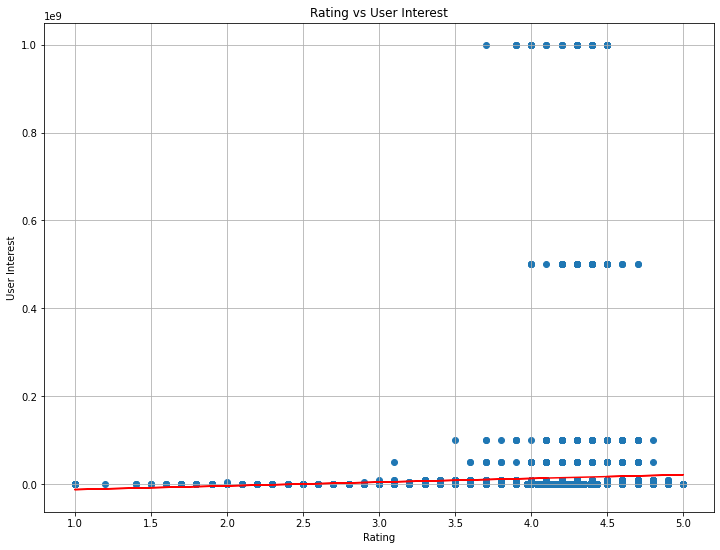

In [54]:
x = linreg_df.iloc[:, 0].values.reshape(-1, 1)
y = linreg_df.iloc[:, 1].values.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(x, y)
y_pred = linreg.predict(x)

plt.figure(figsize=(12, 9))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title("Rating vs User Interest")
plt.xlabel("Rating")
plt.ylabel("User Interest")
plt.grid(True)
plt.show()

As can be seen from the above figure, there are large cavities with regard to the user interest (`Installs`) as compared to the `Rating` variable. This may be attributed to the existing values for the former variable.

In [55]:
install_vals = linreg_df['Installs'].unique()
install_vals.sort()
install_vals.astype(int)

array([         1,          5,         10,         50,        100,
              500,       1000,       5000,      10000,      50000,
           100000,     500000,    1000000,    5000000,   10000000,
         50000000,  100000000,  500000000, 1000000000])

The original dataset listed the values for `Installs` as strings of the form $x+$ where $x$ is any number from the above array. Upon execution of EDA and data cleaning, the values for this variable have been turned to floating-point numbers.

Evidently, however, this left the values to be heavily varied with a standard deviation of *242403260* as seen below.

In [56]:
install_vals.std()

242403260.0

This is the reason why the scatterplot showed high variability with regard to the dependent values, specifically how the larger values (1 billion, 500 million, 100 million, 50 million) can easily be distinguished while the other values are cramped on the bottom of the plot.

To remove, or at least minimize, this variability, the researchers have decided to give random values within the correct range. 

For example, an application with an original `Installs` value of `500000+` and translated to a value of `500000.0` after EDA will be assigned a random value between 500000 and 1000000. This is in accordance with its original value of at least 500000 (`500000+`) but less than 1000000.

In [57]:
np.random.seed(1)

def getInstallSampleVal (base):
    if (base == 1000000000):
        return 1000000000
    
    base_index = np.where(install_vals == base)[0][0]
    min_val = install_vals[base_index]
    max_val = install_vals[base_index + 1]
    
    return float(np.random.randint(min_val, max_val))

The generated values may be seen below.

In [58]:
sample_vals = []

for val in linreg_df['Installs']:
    sample_vals.append(getInstallSampleVal(val))

linreg_df['Installs_sample'] = sample_vals
linreg_df

,Rating,Installs,Installs_sample
0,4.10000,10000.0,43003.0
1,3.90000,500000.0,970924.0
2,4.70000,5000000.0,8937352.0
3,4.50000,50000000.0,50491263.0
4,4.30000,100000.0,412201.0
...,...,...,...
10836,4.50000,5000.0,6007.0
10837,5.00000,100.0,289.0
10838,4.18245,1000.0,4693.0
10839,4.50000,1000.0,2047.0


In [59]:
linreg_df['Installs_sample'].std()

107232458.68408608

The standard deviation of the generated values is 107232458.6841. This may still be a larger than usual number but the variability of values has been decreased considering that the earlier standard deviation is more than 200 million.

The same process as before will be applied. The generated values will be plotted as the variable dependent on the original rating values.

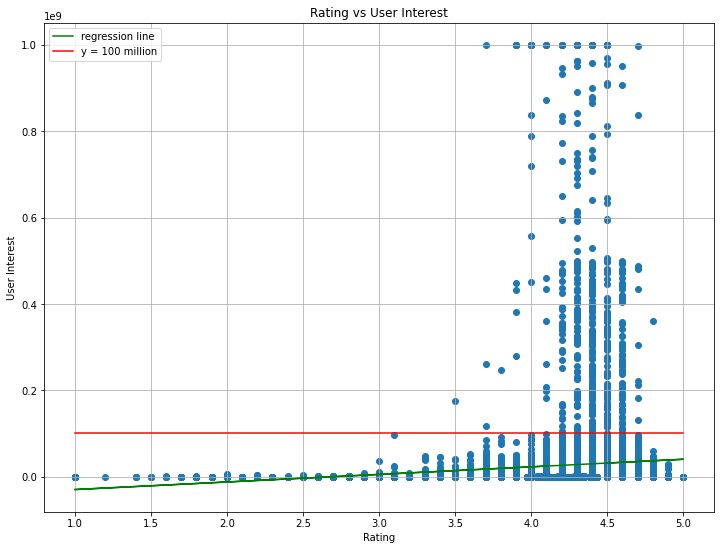

In [60]:
x_s = linreg_df.iloc[:, 0].values.reshape(-1, 1)
y_s = linreg_df.iloc[:, 2].values.reshape(-1, 1)

linreg_s = LinearRegression()
linreg_s.fit(x_s, y_s)
y_s_pred = linreg_s.predict(x_s)

plt.figure(figsize=(12, 9))
plt.scatter(x_s, y_s)
plt.plot(x_s, y_s_pred, color='green', label="regression line")
plt.plot([1, 5], [100000000, 100000000], color="red", label="y = 100 million")
plt.title("Rating vs User Interest")
plt.xlabel("Rating")
plt.ylabel("User Interest")
plt.grid(True)
plt.legend()
plt.show()

As can be seen from the figure above, the variability has somewhat decreased and the regression line is more akin to the data than before. However, considering the entire graph the overall variability is still evident considering that the $range$ of the dataset itself if (1000000000 - 1) or 999999999. 

In [61]:
print("Applications with less than 100 million installs: " +  str(len(linreg_df[linreg_df['Installs'] < 100000000])))
print("Applications with at least 100 million installs: " + str(len(linreg_df[linreg_df['Installs'] >= 100000000])))

Applications with less than 100 million installs: 9861
Applications with at least 100 million installs: 479


The regression line, albeit more defined than before, can only be observed on the lower portion of the graph which may be due to the fact that a majority of the observations (n = 9861 / 10340) have `Installs` and, therefore, `Installs_sample` values of less than 100 million.

To conlude this section, the researchers have decided to repeat the previous processes with minimized datasets.

In [62]:
linreg_1_df = linreg_df[linreg_df['Installs'] < 100000000]
linreg_1_df

,Rating,Installs,Installs_sample
0,4.10000,10000.0,43003.0
1,3.90000,500000.0,970924.0
2,4.70000,5000000.0,8937352.0
3,4.50000,50000000.0,50491263.0
4,4.30000,100000.0,412201.0
...,...,...,...
10836,4.50000,5000.0,6007.0
10837,5.00000,100.0,289.0
10838,4.18245,1000.0,4693.0
10839,4.50000,1000.0,2047.0


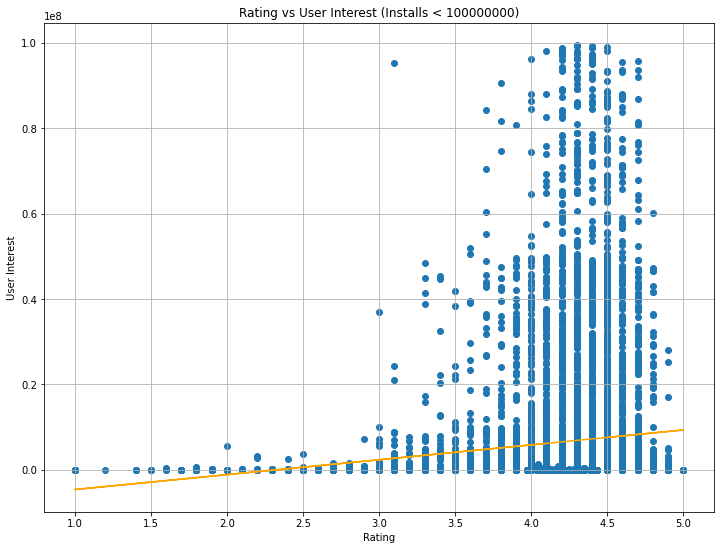

In [63]:
x_1 = linreg_1_df.iloc[:, 0].values.reshape(-1, 1)
y_1 = linreg_1_df.iloc[:, 2].values.reshape(-1, 1)

linreg_1 = LinearRegression()
linreg_1.fit(x_1, y_1)
y_1_pred = linreg_1.predict(x_1)

plt.figure(figsize=(12, 9))
plt.scatter(x_1, y_1)
plt.plot(x_1, y_1_pred, color='orange')
plt.title("Rating vs User Interest (Installs < 100000000)")
plt.xlabel("Rating")
plt.ylabel("User Interest")
plt.grid(True)
plt.show()

Minimizing the dataset to include only the majority of observations (`Installs` < 100000000) still yields a positive regression line (higher ratings yields higher installations).

In [64]:
linreg_100_df = linreg_df[linreg_df['Installs'] >= 100000000]
linreg_100_df

,Rating,Installs,Installs_sample
139,4.6,1.000000e+08,2.587054e+08
143,4.2,1.000000e+08,3.870625e+08
152,3.9,1.000000e+09,1.000000e+09
194,4.3,1.000000e+08,4.980057e+08
293,4.3,1.000000e+08,3.188209e+08
...,...,...,...
10186,4.4,1.000000e+08,3.958516e+08
10253,4.3,1.000000e+08,4.103663e+08
10327,4.5,1.000000e+08,1.957104e+08
10647,3.9,1.000000e+08,2.788032e+08


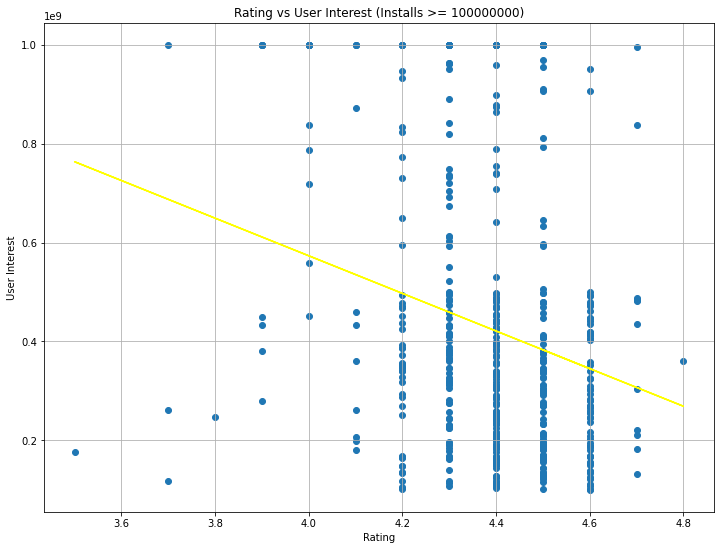

In [65]:
x_100 = linreg_100_df.iloc[:, 0].values.reshape(-1, 1)
y_100 = linreg_100_df.iloc[:, 2].values.reshape(-1, 1)

linreg_100 = LinearRegression()
linreg_100.fit(x_100, y_100)
y_100_pred = linreg_100.predict(x_100)

plt.figure(figsize=(12, 9))
plt.scatter(x_100, y_100)
plt.plot(x_100, y_100_pred, color='yellow')
plt.title("Rating vs User Interest (Installs >= 100000000)")
plt.xlabel("Rating")
plt.ylabel("User Interest")
plt.grid(True)
plt.show()

Further minimizing the dataset to include only observations with `Installs` values of at least 100000000 results in the figure above. Contrary to the figure from before, a negative relationship may be observed from this figure as evidenced by the regression line above.

**Conclusion**

To answer the subquestion for this section, ratings are not significantly relevant in user interest. The contrasting relationships that have been shown in this section are evidences of this.

While the scatterplots initially show that a higher rating will yield more installations for an application, the contrasting regression lines may prove otherwise. The `Rating vs User Interest (Installs < 100000000)` plot shows that a higher rating may indeed mean more installs for the application but the `Rating vs User Interest (Installs >= 100000000)` plot shows the reverse: higher ratings mean lower installation numbers.

## 2. Is it possible to suggest the rating of an app given the variables?

To answer this question, the researchers aimed to find the most similar items to an app with no rating given. That is why in this question, the `collab_ratings` variable will be used. However, compared to normal cosine similarity, the researchers decided to use it strictly on categorical data only.

To modify the dataframe suitable for cosine similarity, one-hot encoding will be implemented on the columns that are categorical.

In [66]:
le = LabelEncoder()

The specific columns that are strictly categorical will be taken.

In [67]:
collab_df = apps_df[['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Binned Reviews', 'Binned Size', 'Binned Installs']]
collab_df

,App,Category,Type,Content Rating,Genres,Binned Reviews,Binned Size,Binned Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,Reviews(small),Size(large),Installs(small)
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design,Reviews(average),Size(average),Installs(average)
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,Reviews(very large),Size(small),Installs(large)
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Reviews(very large),Size(large),Installs(very large)
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design,Reviews(average),Size(very small),Installs(average)
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,Reviews(small),Size(very large),Installs(small)
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,Reviews(very small),Size(very small),Installs(very small)
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,Reviews(very small),Size(small),Installs(very small)
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature,Books & Reference,Reviews(small),Size(average),Installs(very small)


Each category column is then transformed into numerical categories.

In [68]:
collab_df['Type']= le.fit_transform(collab_df['Type'])
collab_df['Category']= le.fit_transform(collab_df['Category'])
collab_df['Content Rating']= le.fit_transform(collab_df['Content Rating'])
collab_df['Genres']= le.fit_transform(collab_df['Genres'])
collab_df['Binned Reviews']= le.fit_transform(collab_df['Binned Reviews'])
collab_df['Binned Size']= le.fit_transform(collab_df['Binned Size'])
collab_df['Binned Installs']= le.fit_transform(collab_df['Binned Installs'])
collab_df

,App,Category,Type,Content Rating,Genres,Binned Reviews,Binned Size,Binned Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,0,1,3,2,1,2
1,Coloring book moana,0,0,1,3,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,0,1,3,3,2,1
3,Sketch - Draw & Paint,0,0,3,3,3,1,3
4,Pixel Draw - Number Art Coloring Book,0,0,1,3,0,4,0
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,11,0,1,15,2,3,2
10837,Fr. Mike Schmitz Audio Teachings,11,0,1,15,4,4,4
10838,Parkinson Exercices FR,20,0,1,26,4,2,4
10839,The SCP Foundation DB fr nn5n,3,0,2,7,2,0,4


Each category is then converted using one-hot encoding and assigned to their respective columns.

In [69]:
one_hot_category = pd.get_dummies(collab_df['Category'], prefix = 'category')
one_hot_type = pd.get_dummies(collab_df['Type'], prefix = 'type')
one_hot_content_rating = pd.get_dummies(collab_df['Content Rating'], prefix = 'content_rating')
one_hot_genre = pd.get_dummies(collab_df['Genres'], prefix = 'genre')
one_hot_review = pd.get_dummies(collab_df['Binned Reviews'], prefix = 'review')
one_hot_size = pd.get_dummies(collab_df['Binned Size'], prefix = 'size')
one_hot_install = pd.get_dummies(collab_df['Binned Installs'], prefix = 'install')

After this, concatenate the new columns and drop the previous columns, making the new dataframe a fully binary data.

In [70]:
collab_df = collab_df.join([one_hot_category, one_hot_type, one_hot_content_rating, one_hot_genre, one_hot_review, one_hot_size, one_hot_install])
collab_df

,App,Category,Type,Content Rating,Genres,Binned Reviews,Binned Size,Binned Installs,category_0,category_1,...,size_0,size_1,size_2,size_3,size_4,install_0,install_1,install_2,install_3,install_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,0,1,3,2,1,2,1,0,...,0,1,0,0,0,0,0,1,0,0
1,Coloring book moana,0,0,1,3,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,0,1,3,3,2,1,1,0,...,0,0,1,0,0,0,1,0,0,0
3,Sketch - Draw & Paint,0,0,3,3,3,1,3,1,0,...,0,1,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,0,0,1,3,0,4,0,1,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,11,0,1,15,2,3,2,0,0,...,0,0,0,1,0,0,0,1,0,0
10837,Fr. Mike Schmitz Audio Teachings,11,0,1,15,4,4,4,0,0,...,0,0,0,0,1,0,0,0,0,1
10838,Parkinson Exercices FR,20,0,1,26,4,2,4,0,0,...,0,0,1,0,0,0,0,0,0,1
10839,The SCP Foundation DB fr nn5n,3,0,2,7,2,0,4,0,0,...,1,0,0,0,0,0,0,0,0,1


In [71]:
collab_df = collab_df.drop(columns=['Category', 'Type', 'Content Rating', 'Genres', 'Binned Reviews', 'Binned Size', 'Binned Installs'])
collab_df

,App,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,...,size_0,size_1,size_2,size_3,size_4,install_0,install_1,install_2,install_3,install_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Coloring book moana,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,Sketch - Draw & Paint,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
10837,Fr. Mike Schmitz Audio Teachings,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10838,Parkinson Exercices FR,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10839,The SCP Foundation DB fr nn5n,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Setting of the index into the app name itself makes it possible to use collaborative filtering functions in the following cells.

In [72]:
collab_df = collab_df.set_index('App')
collab_df

,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,...,size_0,size_1,size_2,size_3,size_4,install_0,install_1,install_2,install_3,install_4
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
Coloring book moana,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
Sketch - Draw & Paint,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Pixel Draw - Number Art Coloring Book,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
Fr. Mike Schmitz Audio Teachings,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Parkinson Exercices FR,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


For this question, the researchers chose 500 apps that can be similar to the chosen app because that is what the researchers thought would be a good starting ground for the filtering process.

In [73]:
cfilter = CollaborativeFiltering(500)

Using the `collab_rating` column, it is possible to search for a NaN value inside this and use that as the test case.

In [74]:
collab_ratings

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3
...,...,...
10335,Sya9a Maroc - FR,4.5
10336,Fr. Mike Schmitz Audio Teachings,5.0
10337,Parkinson Exercices FR,NaN
10338,The SCP Foundation DB fr nn5n,4.5


It is seen that index 10337 does not contain a rating. Let us try and suggest a rating using that as a basis.

In [75]:
index = 10337

In [76]:
collab_df['index'] = range(0, len(collab_df))
collab_df

,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,...,size_1,size_2,size_3,size_4,install_0,install_1,install_2,install_3,install_4,index
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
Coloring book moana,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,2
Sketch - Draw & Paint,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,3
Pixel Draw - Number Art Coloring Book,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,10335
Fr. Mike Schmitz Audio Teachings,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,10336
Parkinson Exercices FR,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,10337


The cosine similarity, $S_c$, between two vectors $A$ and $B$ is computed as:
$$S_c(A, B)=\dfrac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}$$

For example, let us use the first app as a basis, and use the `get_cosine_similarity()` function:

In [77]:
sim, ind = cfilter.get_cosine_similarity(collab_df.iloc[0, :], collab_df.iloc[1:, :])
print('Photo Editor & Candy Camera & Grid & ScrapBook:', [round(x, 2) for x in collab_df.iloc[0, :]])
print('\nCosine similarities:\n' + str(sim))

Photo Editor & Candy Camera & Grid & ScrapBook: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]

Cosine similarities:
App
Coloring book moana                                   0.571429
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.571429
Sketch - Draw & Paint                                 0.571429
Pixel Draw - Number Art Coloring Book                 0.571429
Paper flowers instructions                            0.714286
                                                        ...   
Sya9a Maroc - FR                                      0.571429
Fr. Mike Schmitz Audio Teachings                      0.285714
Parkinson Exercices FR                                0.285714
The SCP Foundation DB fr nn5n                 

It is possible to find the k similar apps using the `get_k_similar()` function. In this case, the k was instantiated to be 500.

In [78]:
main_app = collab_df.iloc[index, :]
other_apps = collab_df.iloc[:index, :].append(collab_df.iloc[index+1:, :])
similar_index, similar_apps = cfilter.get_k_similar(other_apps, main_app)
print(similar_apps)

                                                        0  index
App                                                             
PCOS Guide - Fight PCOS naturally                1.000000   2160
Cochrane Library                                 1.000000   2163
Smartshading AI                                  1.000000   2172
Anatomy & Physiology Vocabulary Exam Review App  1.000000   2178
Drug Calculator                                  1.000000   2179
...                                                   ...    ...
DV KING 4K                                       0.714286   8460
DV KING                                          0.714286   8476
DW Espanol                                       0.714286   8496
News :DW Bangali                                 0.714286   8497
News: DW Hausa                                   0.714286   8499

[500 rows x 2 columns]


The rating of user `x` to item `i`, represented as $r_{xi}$, given the set of similar items `N`, is computed as:

$$r_{xi}=\dfrac{\sum_{y \in N}^{}s_{xy}r_{yi}}{\sum_{y \in N}^{}s_{xy}}$$

First, we reset the index of the similarities to clean the instance and assign it to `sum_sim`

In [79]:
sum_sim = similar_apps[0]
sum_sim = sum_sim.reset_index()[0]
sum_sim

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
         ...   
495    0.714286
496    0.714286
497    0.714286
498    0.714286
499    0.714286
Name: 0, Length: 500, dtype: float64

Next, the rating for predicting the app is taken from `apps_df`. Note that the researchers did not take the ratings from `collab_ratings`, for it contained NaN values and it was determined to be inaccurate when using it. That is why the researchers decided to use the preprocessed data instead.

In [80]:
rating_for_prediction = apps_df[['App', 'Rating']].reset_index(drop=True)
rating_for_prediction

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.10000
1,Coloring book moana,3.90000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.70000
3,Sketch - Draw & Paint,4.50000
4,Pixel Draw - Number Art Coloring Book,4.30000
...,...,...
10335,Sya9a Maroc - FR,4.50000
10336,Fr. Mike Schmitz Audio Teachings,5.00000
10337,Parkinson Exercices FR,4.18245
10338,The SCP Foundation DB fr nn5n,4.50000


After obtaining the ratings, the index of, in this case, the 500 apps is taken from `similar_apps`, which will be the rating respective to the similarity in the specific rows. Resetting of index is also done to clean the instance.

In [81]:
rating_sim = rating_for_prediction.iloc[similar_apps['index']]
rating_sim = rating_sim['Rating'].reset_index(drop=True)
rating_sim

0      4.182450
1      3.700000
2      4.182450
3      5.000000
4      4.182450
         ...   
495    2.300000
496    3.000000
497    4.128505
498    4.128505
499    4.900000
Name: Rating, Length: 500, dtype: float64

After finding the top cosine similarities of the apps and the ratings of those apps, the formula can be done.

In [82]:
(sum_sim * rating_sim).sum() / sum_sim.sum()

4.168671715677769

`(sum_sim * rating_sim).sum()` denotes $${\sum_{y \in N}^{}s_{xy}r_{yi}}$$ of the equation, and `sum_sim.sum()` denotes $${\sum_{y \in N}^{}s_{xy}}$$

**Conclusion**

It is possible to suggest a rating using the dataset presented. Using cosine similarities of one-hot encoded data, predicting the rating of an app containing preprocessed data can be done. It is possible to continue this prediction to other ratings by **assigning the newly found rating** to its respective app, and **solve for the ratings of other preprocessed apps**. Repetition of these steps will yield the process closer and closer prediction of the rating after many iterations.